In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address',], axis=1)
x.head()
colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]

In [3]:
class K_Means:
    def __init__(self, tol=0.001, max_iter=300):
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data, k):

        self.centroids = {}

        for i in range(k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):

            self.classifications = {}

            for i in range(k):
                self.classifications[i] = []

            for featureset in data:
                distances = [
                    np.linalg.norm(
                        featureset-self.centroids[centroid]
                    ) 
                        for centroid in self.centroids
                    ]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0
                )
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [
            np.linalg.norm(
                data-self.centroids[centroid]
            ) for centroid in self.centroids
        ]

        classification = distances.index(min(distances))

        return classification

In [4]:
x2 = x[['Latitude','Longitude', 'SO2']].copy()
x2.head()

,Latitude,Longitude,SO2
0,37.55558,126.905597,0.005071
1,37.55558,126.905597,0.005375
2,37.55558,126.905597,0.005222
3,37.55558,126.905597,0.005167
4,37.55558,126.905597,0.003905


In [5]:
X_train, testSet = train_test_split(x2, test_size=0.2,random_state=42)

In [8]:
x_array = np.array(X_train)
len(x_array)

21251

In [7]:
# scaler = MinMaxScaler()
# x_scaled = scaler.fit_transform(x_array)
# # x_scaled = preprocessing.scale(x_array)
# x_scaled

In [8]:
# test_array = np.array(testSet)

In [9]:
# scaler = MinMaxScaler()
# test_scaled = scaler.fit_transform(test_array)
# test_scaled

In [10]:
# for clas in test_scaled:
#     classification = clf.predict(clas)
#     plt.scatter( clas[0], clas[1],color = colors[classification],marker='*', s=150, linewidths=1)
# plt.show()

In [9]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_array)
    wcss_iteration = kmeans.inertia_
    wcss.append(wcss_iteration)

In [10]:
wcss

[192.88333540729226,
 87.06823453752827,
 57.82924851310752,
 40.21407375938768,
 28.961389391805827,
 22.190460021090345,
 17.82813325273851,
 15.24978888452325,
 11.801942779155983,
 10.25760381004135]

<function matplotlib.pyplot.show(*args, **kw)>

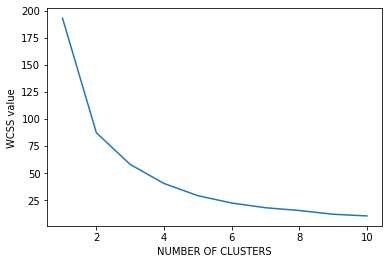

In [11]:
number_of_clusters = range(1,11)
plt.plot(number_of_clusters,wcss)
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS value')
plt.show

In [ ]:
clf = K_Means()
clf.fit(x_array, 2)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)

list_class = []
for centroid in clf.centroids:
    ax.scatter(
        clf.centroids[centroid][0], clf.centroids[centroid][1], clf.centroids[centroid][2],
        marker='o', color='k', s=150, linewidths=5
    )
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(
            featureset[0], featureset[1], featureset[2],
            marker='x', color=color, s=150, linewidths=1
        )
        list_class.append(classification)
plt.show()